This notebook contains functionality to perform the following:

Explore and visualize first version of the canola organelle data (`CanolaOrganelles_v.1.tsv`). We look at both sequence features and the target distribution. Any of the cells that are commented out rely on a file that was generated before we knew that there were two organelles in the same file. The output is saved for your perusal anyway.

In [ ]:
# mount google drive

from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/Shareddrives/NRC_Amii_Agronomics_Project/nrc-ml-plant-genomics/'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from collections import Counter

%matplotlib inline

In [ ]:
df = pd.read_csv('data/raw/CanolaOrganelles_v.1.tsv', sep="\t", header=None)

In [ ]:
df.shape

(74886, 2)

In [ ]:
df.head()

,0,1
0,AATCATAATAACTTGGTCCCGGGCATCACGGGCGAACGACGGGAAT...,0.26
1,TAATAACTTGGTCCCGGGCATCACGGGCGAACGACGGGAATTGAAC...,0.27
2,ACTTGGTCCCGGGCATCACGGGCGAACGACGGGAATTGAACCCGCG...,0.27
3,GTCCCGGGCATCACGGGCGAACGACGGGAATTGAACCCGCGATGGT...,0.27
4,GGGCATCACGGGCGAACGACGGGAATTGAACCCGCGATGGTGAATT...,0.27


In [ ]:
np.mean(df[1])  # mean expression value

-0.2862879576956974

In [ ]:
np.median(df[1])  # median expression value

-0.4

In [ ]:
np.std(df[1])  # standard deviation expression value

0.5124679397172521

In [ ]:
np.min(df[1])

-2.05

In [ ]:
np.max(df[1])

1.66

In [ ]:
# # obsolete

# with open("new_data/fasta_file", "r") as f:  # read in genetic sequence
#     sqnc = f.readlines()[-1]

In [ ]:
# # obsolete

# len(sqnc)  # total number of NTs

374570

In [ ]:
# # obsolete

# sqnc[:100]  # first 100 NTs to visualize sequence

'AATCATAATAACTTGGTCCCGGGCATCACGGGCGAACGACGGGAATTGAACCCGCGATGGTGAATTCACAATCCACTGCCTTAATCCACTTGGCTACATC'

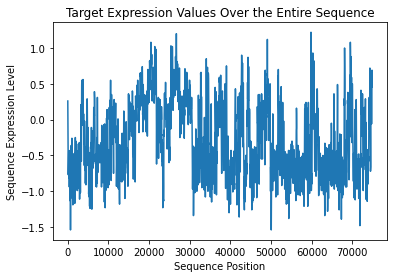

In [ ]:
n = 29  # such that there is no overlap

fig = plt.figure()

fig.patch.set_facecolor('white')

plt.plot(df.iloc[::n, 1])  # selected every nth row
plt.xlabel("Sequence Position")
plt.ylabel("Sequence Expression Level")
plt.title("Target Expression Values Over the Entire Sequence")
plt.show()

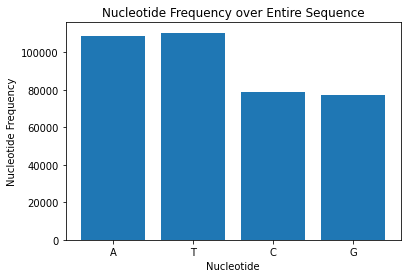

In [ ]:
# # nucleotide frequencies over entire sequence

# freq_dict = Counter(sqnc)  # obsolete
# fig = plt.figure()

# fig.patch.set_facecolor('white')
# plt.bar(freq_dict.keys(), freq_dict.values())
# plt.xlabel("Nucleotide")
# plt.ylabel("Nucleotide Frequency")
# plt.title("Nucleotide Frequency over Entire Sequence")
# plt.show()

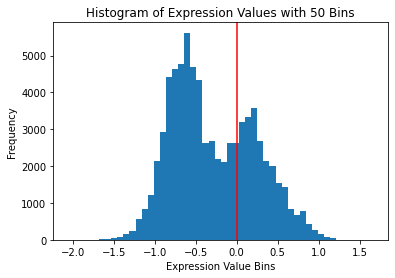

In [ ]:
# distribution of target values
fig = plt.figure()

fig.patch.set_facecolor('white')
plt.hist(df[1], bins=50)
plt.axvline(x=0, c="r")  # red line marks zero
plt.xlabel("Expression Value Bins")
plt.ylabel("Frequency")
plt.title("Histogram of Expression Values with 50 Bins")
plt.show()

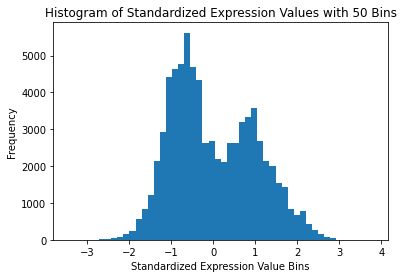

In [ ]:
# test normalizing -- not sure if this is correct based on previous treatments
fig = plt.figure()

fig.patch.set_facecolor('white')

standardized = (df[1] - np.mean(df[1]))/np.std(df[1])
plt.hist(standardized, bins=50)
plt.xlabel("Standardized Expression Value Bins")
plt.ylabel("Frequency")
plt.title("Histogram of Standardized Expression Values with 50 Bins")
plt.show()

In [ ]:
# count number of each NT in a sequence
for nt in ["A", "T", "C", "G"]:
    df[nt] = df[0].str.count(nt)

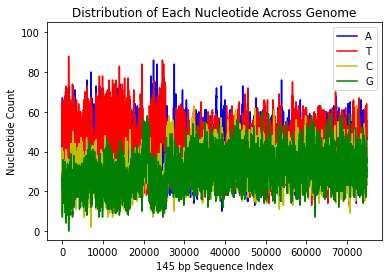

In [ ]:
# show number of each NT in sliding window over sequence
fig = plt.figure()

fig.patch.set_facecolor('white')

plt.plot(df["A"], "b")
plt.plot(df["T"], "r")
plt.plot(df["C"], "y")
plt.plot(df["G"], "g")
plt.legend(["A", "T", "C", "G"])
x1,x2,y1,y2 = plt.axis()  
plt.axis((x1,x2,y1,105))
plt.xlabel("145 bp Sequence Index")
plt.ylabel("Nucleotide Count")
plt.title("Distribution of Each Nucleotide Across Genome")
plt.show()

---
### Chloroplast Only

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from collections import Counter

%matplotlib inline

In [ ]:
df = pd.read_csv('data/raw/hidra.tsv', sep="\t", header=None)

In [ ]:
df.shape

(74886, 9)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8
0,NC_016734.1,0,145,AATCATAATAACTTGGTCCCGGGCATCACGGGCGAACGACGGGAAT...,998,316,338.31,405.52,0.26
1,NC_016734.1,5,150,TAATAACTTGGTCCCGGGCATCACGGGCGAACGACGGGAATTGAAC...,998,318,338.31,408.08,0.27
2,NC_016734.1,10,155,ACTTGGTCCCGGGCATCACGGGCGAACGACGGGAATTGAACCCGCG...,998,318,338.31,408.08,0.27
3,NC_016734.1,15,160,GTCCCGGGCATCACGGGCGAACGACGGGAATTGAACCCGCGATGGT...,998,318,338.31,408.08,0.27
4,NC_016734.1,20,165,GGGCATCACGGGCGAACGACGGGAATTGAACCCGCGATGGTGAATT...,998,318,338.31,408.08,0.27


In [ ]:
df = df[df[0] == "NC_016734.1"]

In [ ]:
df.shape

(30544, 9)

In [ ]:
np.mean(df[8])  # mean expression value

-0.11711399947616556

In [ ]:
np.median(df[8])  # median expression value

-0.08

In [ ]:
np.std(df[8])  # standard deviation expression value

0.517288702236914

In [ ]:
np.min(df[8])

-2.05

In [ ]:
np.max(df[8])

1.22

In [ ]:
sqnc = "".join(df[3].str[0:5])+df.iloc[-1, 3][5:]

In [ ]:
len(sqnc)  # total number of NTs

152860

In [ ]:
sqnc[:100]  # first 100 NTs to visualize sequence

'AATCATAATAACTTGGTCCCGGGCATCACGGGCGAACGACGGGAATTGAACCCGCGATGGTGAATTCACAATCCACTGCCTTAATCCACTTGGCTACATC'

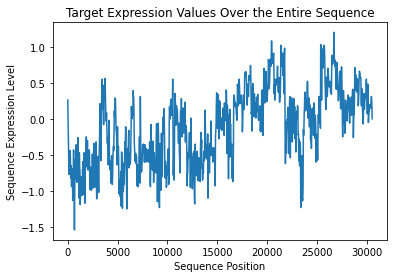

In [ ]:
n = 29  # such that there is no overlap

fig = plt.figure()

fig.patch.set_facecolor('white')

plt.plot(df.iloc[::n, 8])  # selected every nth row
plt.xlabel("Sequence Position")
plt.ylabel("Sequence Expression Level")
plt.title("Target Expression Values Over the Entire Sequence")
plt.show()

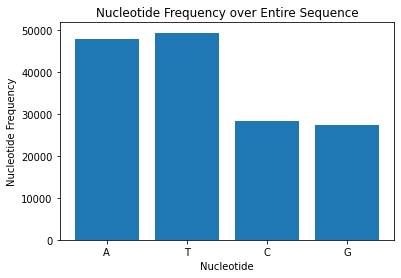

In [ ]:
freq_dict = Counter(sqnc)
fig = plt.figure()

fig.patch.set_facecolor('white')
plt.bar(freq_dict.keys(), freq_dict.values())
plt.xlabel("Nucleotide")
plt.ylabel("Nucleotide Frequency")
plt.title("Nucleotide Frequency over Entire Sequence")
plt.show()

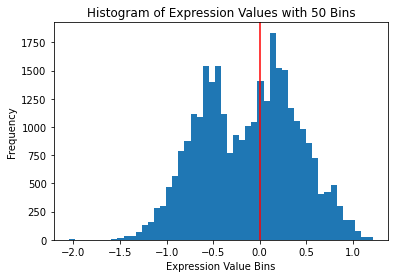

In [ ]:
# distribution of target values
fig = plt.figure()

fig.patch.set_facecolor('white')
plt.hist(df[8], bins=50)
plt.axvline(x=0, c="r")  # red line marks zero
plt.xlabel("Expression Value Bins")
plt.ylabel("Frequency")
plt.title("Histogram of Expression Values with 50 Bins")
plt.show()

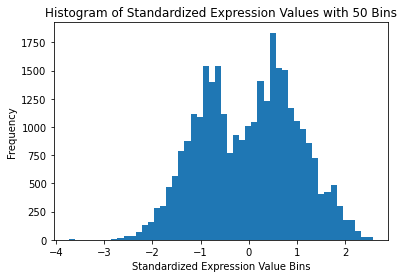

In [ ]:
# test normalizing -- not sure if this is correct based on previous treatments
fig = plt.figure()

fig.patch.set_facecolor('white')

standardized = (df[8] - np.mean(df[8]))/np.std(df[8])
plt.hist(standardized, bins=50)
plt.xlabel("Standardized Expression Value Bins")
plt.ylabel("Frequency")
plt.title("Histogram of Standardized Expression Values with 50 Bins")
plt.show()

In [ ]:
# count number of each NT in a sequence
for nt in ["A", "T", "C", "G"]:
    df[nt] = df[3].str.count(nt)

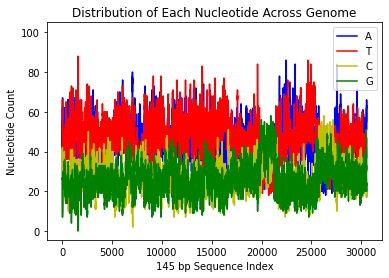

In [ ]:
# show number of each NT in sliding window over sequence
fig = plt.figure()

fig.patch.set_facecolor('white')

plt.plot(df["A"], "b")
plt.plot(df["T"], "r")
plt.plot(df["C"], "y")
plt.plot(df["G"], "g")
plt.legend(["A", "T", "C", "G"])
x1,x2,y1,y2 = plt.axis()  
plt.axis((x1,x2,y1,105))
plt.xlabel("145 bp Sequence Index")
plt.ylabel("Nucleotide Count")
plt.title("Distribution of Each Nucleotide Across Genome")
plt.show()

---
### Mitochondria Only

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from collections import Counter

%matplotlib inline

In [ ]:
df = pd.read_csv('data/raw/hidra.tsv', sep="\t", header=None)

In [ ]:
df.shape

(74886, 9)

In [ ]:
df.tail()

,0,1,2,3,4,5,6,7,8
74881,NC_008285.1,221685,221830,ATGGAGTTGTGTTTTGCCACCTGGAGTTTTAATGGAAGTTTGAGTG...,183,67,62.04,85.98,0.47
74882,NC_008285.1,221690,221835,GTTGTGTTTTGCCACCTGGAGTTTTAATGGAAGTTTGAGTGCGTCC...,179,67,60.68,85.98,0.50
74883,NC_008285.1,221695,221840,GTTTTGCCACCTGGAGTTTTAATGGAAGTTTGAGTGCGTCCTAAAA...,178,65,60.34,83.41,0.47
74884,NC_008285.1,221700,221845,GCCACCTGGAGTTTTAATGGAAGTTTGAGTGCGTCCTAAAAGCCAA...,165,62,55.93,79.56,0.51
74885,NC_008285.1,221705,221850,CTGGAGTTTTAATGGAAGTTTGAGTGCGTCCTAAAAGCCAATGCTT...,161,58,54.58,74.43,0.45


In [ ]:
df = df[df[0] == "NC_008285.1"]

In [ ]:
df.shape

(44342, 13)

In [ ]:
np.mean(df[8])  # mean expression value

-0.4028196743493753

In [ ]:
np.median(df[8])  # median expression value

-0.53

In [ ]:
np.std(df[8])  # standard deviation expression value

0.4753000414062562

In [ ]:
np.min(df[8])

-1.77

In [ ]:
np.max(df[8])

1.66

In [ ]:
sqnc = "".join(df[3].str[0:5])+df.iloc[-1, 3][5:]

In [ ]:
len(sqnc)  # total number of NTs

221850

In [ ]:
sqnc[:100]  # first 100 NTs to visualize sequence

'CTGCAGTGCCTTCCCCCCCCTAGTCTAGACCGAGTATCAATAGTTGTAGTTCCTGTCCGTTATGGACCCTTCGTACCTTTCAAATCCAATCAATGTGTGG'

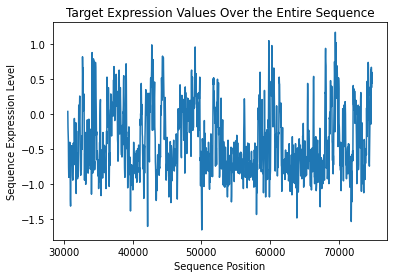

In [ ]:
n = 29  # such that there is no overlap

fig = plt.figure()

fig.patch.set_facecolor('white')

plt.plot(df.iloc[::n, 8])  # selected every nth row
plt.xlabel("Sequence Position")
plt.ylabel("Sequence Expression Level")
plt.title("Target Expression Values Over the Entire Sequence")
plt.show()

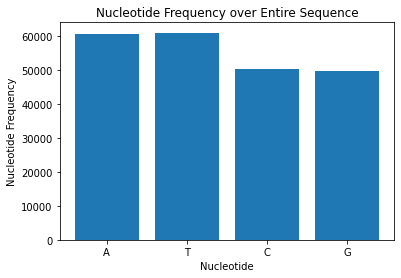

In [ ]:
freq_dict = Counter(sqnc)
fig = plt.figure()

fig.patch.set_facecolor('white')
plt.bar(["A", "T", "C", "G"], [freq_dict[nt] for nt in ["A", "T", "C", "G"]])
plt.xlabel("Nucleotide")
plt.ylabel("Nucleotide Frequency")
plt.title("Nucleotide Frequency over Entire Sequence")
plt.show()

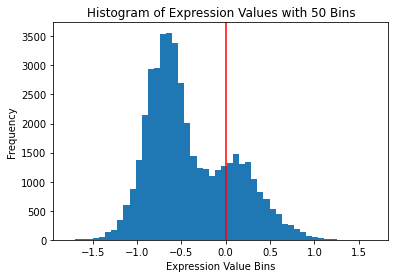

In [ ]:
# distribution of target values
fig = plt.figure()

fig.patch.set_facecolor('white')
plt.hist(df[8], bins=50)
plt.axvline(x=0, c="r")  # red line marks zero
plt.xlabel("Expression Value Bins")
plt.ylabel("Frequency")
plt.title("Histogram of Expression Values with 50 Bins")
plt.show()

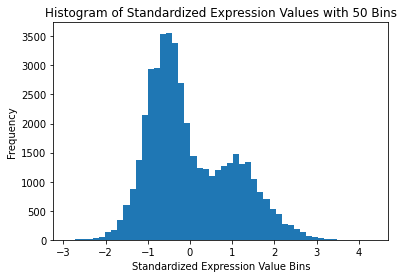

In [ ]:
# test normalizing -- not sure if this is correct based on previous treatments
fig = plt.figure()

fig.patch.set_facecolor('white')

standardized = (df[8] - np.mean(df[8]))/np.std(df[8])
plt.hist(standardized, bins=50)
plt.xlabel("Standardized Expression Value Bins")
plt.ylabel("Frequency")
plt.title("Histogram of Standardized Expression Values with 50 Bins")
plt.show()

In [ ]:
# count number of each NT in a sequence
for nt in ["A", "T", "C", "G"]:
    df[nt] = df[3].str.count(nt)

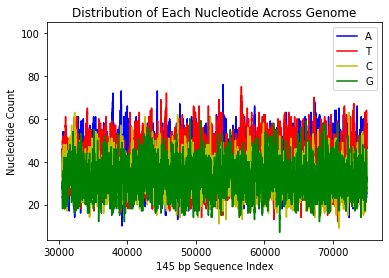

In [ ]:
# show number of each NT in sliding window over sequence
fig = plt.figure()

fig.patch.set_facecolor('white')

plt.plot(df["A"], "b")
plt.plot(df["T"], "r")
plt.plot(df["C"], "y")
plt.plot(df["G"], "g")
plt.legend(["A", "T", "C", "G"])
x1,x2,y1,y2 = plt.axis()  
plt.axis((x1,x2,y1,105))
plt.xlabel("145 bp Sequence Index")
plt.ylabel("Nucleotide Count")
plt.title("Distribution of Each Nucleotide Across Genome")
plt.show()